### Dataset Information

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

* Group 1: 367 instances (January 1989)
* Group 2: 70 instances (October 1989)
* Group 3: 31 instances (February 1990)
* Group 4: 17 instances (April 1990)
* Group 5: 48 instances (August 1990)
* Group 6: 49 instances (Updated January 1991)
* Group 7: 31 instances (June 1991)
* Group 8: 86 instances (November 1991)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Attribute Information

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [2]:
cols = ["ID Number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
        "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
data = pd.read_csv("breast-cancer-wisconsin.data", names=cols)
data.head()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Exploration

In [3]:
data.isnull().sum()

ID Number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [4]:
data.dtypes

ID Number                       int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

**Bare Nuclei**'s type is object. However, bare nuclei must be scaled from 1 - 10 (integer) based on "Attribute Information"

In [5]:
data["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
# Bare Nuclei = "?"
data[data["Bare Nuclei"] == "?"]

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [7]:
import warnings
warnings.filterwarnings("ignore")

# Without a question mark "?" symbol and convert dtype into integer
no_object = data[data["Bare Nuclei"] != "?"]
no_object["Bare Nuclei"] = no_object["Bare Nuclei"].astype("int64")
no_object.dtypes

ID Number                      int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [8]:
no_object.describe()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


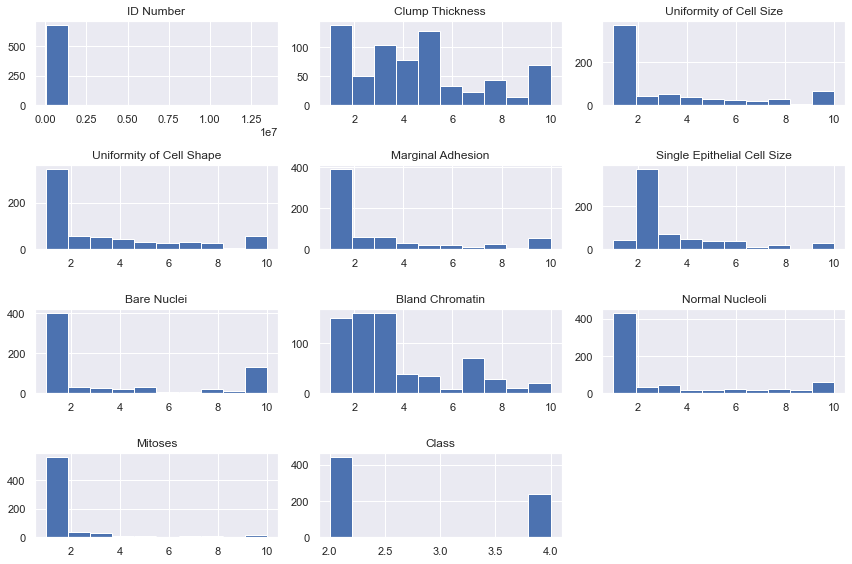

In [9]:
no_object.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

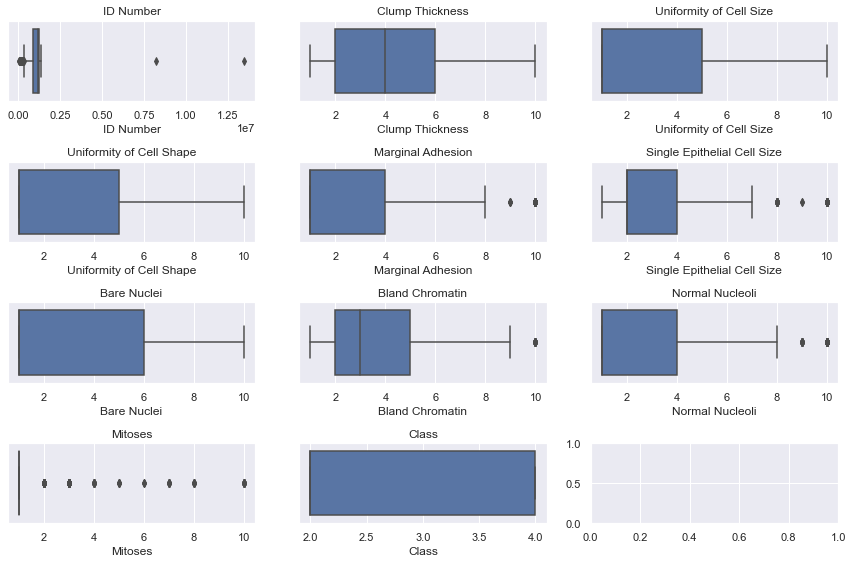

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(12, 8))
cols = no_object.columns

count = 0
row = -1
while count < len(cols):
    if count % 3 == 0:
        row += 1
    col = count % 3
    sns.boxplot(no_object[cols[count]], ax=axs[row, col])
    axs[row, col].set_title(cols[count])
    count += 1
    
plt.tight_layout()
plt.show()

### Data Cleaning

In [11]:
no_object.drop("ID Number", axis=1, inplace=True)
no_object.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [12]:
# Data cleaning: Impute the incorrect values by 1, since the data is concentrated on a value of 1
data.loc[data["Bare Nuclei"] == "?", "Bare Nuclei"] = 1
data["Bare Nuclei"] = data["Bare Nuclei"].astype("int64")

# Dropping ID Number
data.drop("ID Number", axis=1, inplace=True)

data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
data.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [14]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Clump Thickness** and **Bland Chromatin** are assumed to be distributed normally.

### Data Exploration (2)

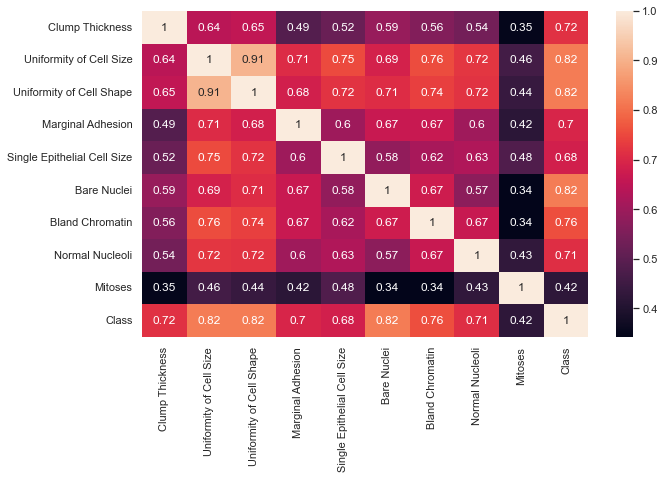

In [15]:
# Correlation Plot
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

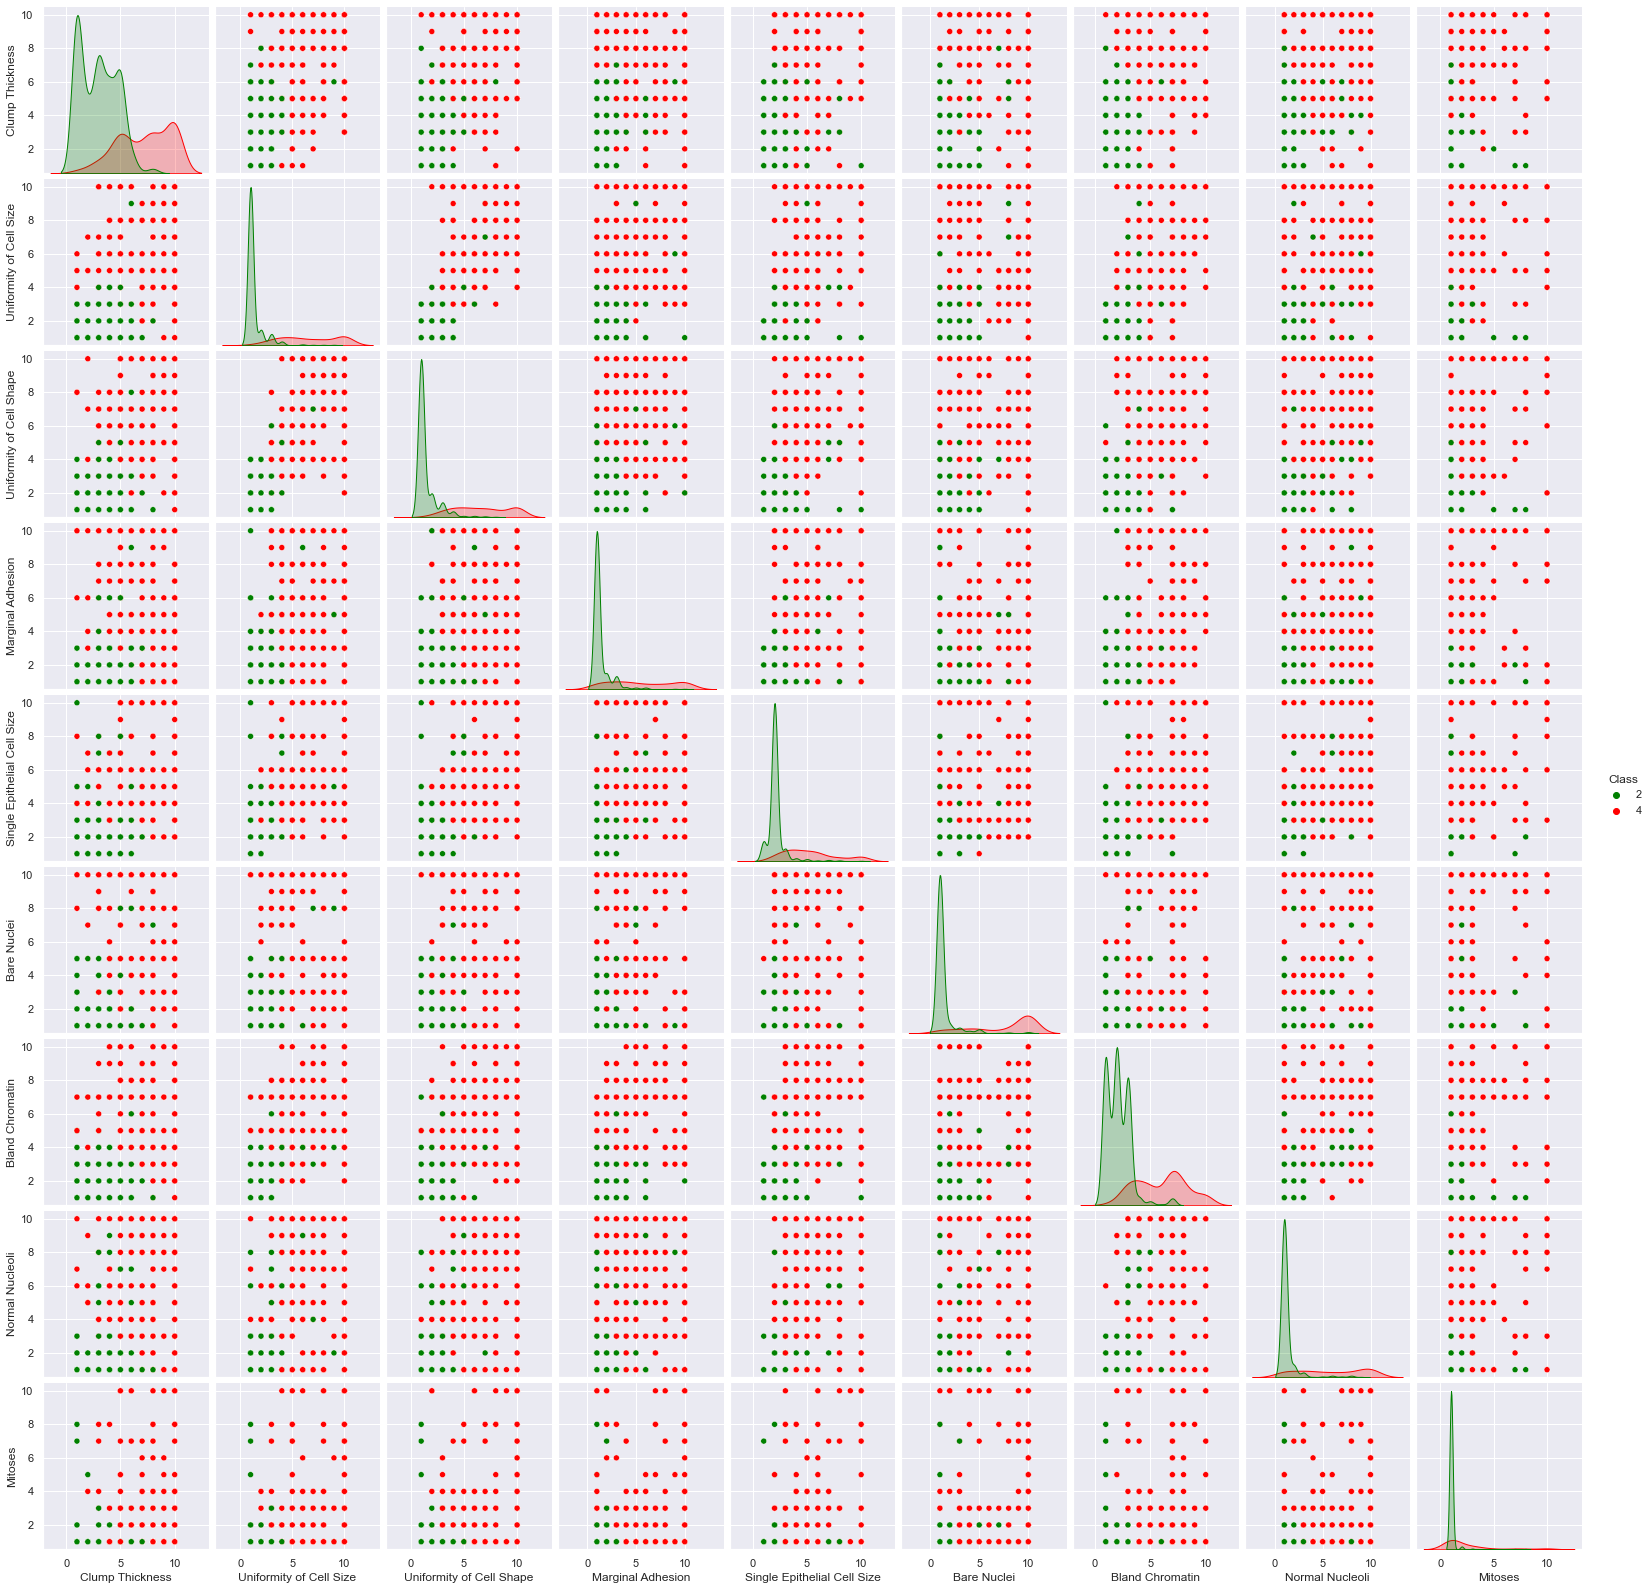

In [16]:
# Pair Plot {2: "Benign", 4: "Malignant"}
sns.pairplot(data, diag_kind="kde", hue="Class", palette=["Green", "Red"])
plt.show()

Based on correlation plot and pair plot, we can see that **Mitoses** give the least correlation on **Class**.

<AxesSubplot:>

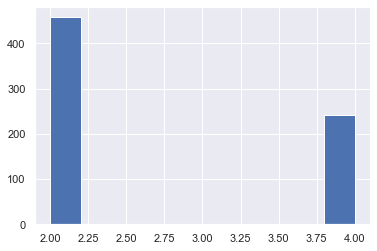

In [17]:
data["Class"].hist()

We assumed there is a possibility of class imbalance

### Model Building

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop("Class", axis=1)
Y = data["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svc = SVC()
knn = KNeighborsClassifier()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

fold_5 = KFold(n_splits=5, shuffle=True, random_state=1)
models = (("SVC", svc), ("KNN", knn))

for name, model in models:
    cv_score = cross_val_score(model, X_train, Y_train, cv=fold_5, scoring="accuracy").mean()
    print(f"{name}'s accuracy: {cv_score}")

SVC's accuracy: 0.9731981981981981
KNN's accuracy: 0.9642052767052768


#### SVC

In [31]:
svc.fit(X_train, Y_train)

SVC()

In [32]:
y_pred = svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



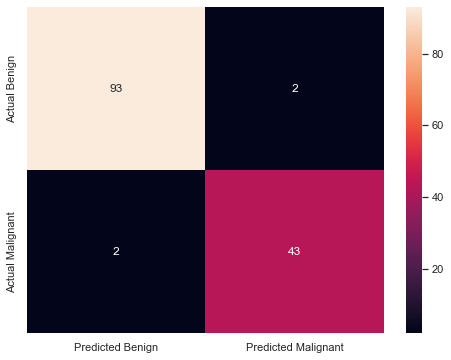

In [39]:
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, index=("Actual Benign", "Actual Malignant"), columns=("Predicted Benign", "Predicted Malignant"))

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True)
plt.show()

#### KNN

In [40]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



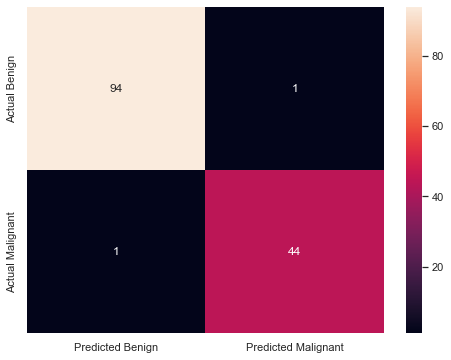

In [42]:
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, index=("Actual Benign", "Actual Malignant"), columns=("Predicted Benign", "Predicted Malignant"))

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True)
plt.show()